In [22]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

from itertools import product
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBRegressor
from xgboost import plot_importance

def plot_features(booster, figsize):    
    fig, ax = plt.subplots(1,1,figsize=figsize)
    return plot_importance(booster=booster, ax=ax)

import time
import sys
import gc
import pickle
sys.version_info

sys.version_info(major=3, minor=6, micro=5, releaselevel='final', serial=0)

In [23]:
df = pd.read_csv('allaggorders.csv')

In [24]:
df.head()

,orderId,status,kitchen,source,brand,orderComment,datetime,date,dayofweek,dayofmonth,dayofyear,month,day,week,total,orderSeq
0,1401860184,DELIVERED,Whitefield,Zomato,Indiana Burgers,NaN,2018-12-01 00:00:00,2018-12-01,7,1,335,12,1,47,178.0,10412
1,1393137807,DELIVERED,Whitefield,Zomato,Warm Oven,NaN,2018-12-01 00:00:00,2018-12-01,7,1,335,12,1,47,609.0,10413
2,1242759148,DELIVERED,Whitefield,Zomato,Warm Oven,NaN,2018-12-01 00:01:00,2018-12-01,7,1,335,12,1,47,649.0,10414
3,1695355671,DELIVERED,Whitefield,Zomato,Warm Oven,NaN,2018-12-01 00:02:00,2018-12-01,7,1,335,12,1,47,140.0,10415
4,26677989628,DELIVERED,Whitefield,Swiggy,Slurpy Shakes,NaN,2018-12-01 00:03:00,2018-12-01,7,1,335,12,1,47,288.0,10416


In [25]:
df.rename(columns={'total': 'sales'}, inplace=True)
df.head()

,orderId,status,kitchen,source,brand,orderComment,datetime,date,dayofweek,dayofmonth,dayofyear,month,day,week,sales,orderSeq
0,1401860184,DELIVERED,Whitefield,Zomato,Indiana Burgers,NaN,2018-12-01 00:00:00,2018-12-01,7,1,335,12,1,47,178.0,10412
1,1393137807,DELIVERED,Whitefield,Zomato,Warm Oven,NaN,2018-12-01 00:00:00,2018-12-01,7,1,335,12,1,47,609.0,10413
2,1242759148,DELIVERED,Whitefield,Zomato,Warm Oven,NaN,2018-12-01 00:01:00,2018-12-01,7,1,335,12,1,47,649.0,10414
3,1695355671,DELIVERED,Whitefield,Zomato,Warm Oven,NaN,2018-12-01 00:02:00,2018-12-01,7,1,335,12,1,47,140.0,10415
4,26677989628,DELIVERED,Whitefield,Swiggy,Slurpy Shakes,NaN,2018-12-01 00:03:00,2018-12-01,7,1,335,12,1,47,288.0,10416


In [26]:
df['date'] = pd.to_datetime(df['date'].str.strip(), format='%Y/%m/%d')
df.head()

,orderId,status,kitchen,source,brand,orderComment,datetime,date,dayofweek,dayofmonth,dayofyear,month,day,week,sales,orderSeq
0,1401860184,DELIVERED,Whitefield,Zomato,Indiana Burgers,NaN,2018-12-01 00:00:00,2018-12-01,7,1,335,12,1,47,178.0,10412
1,1393137807,DELIVERED,Whitefield,Zomato,Warm Oven,NaN,2018-12-01 00:00:00,2018-12-01,7,1,335,12,1,47,609.0,10413
2,1242759148,DELIVERED,Whitefield,Zomato,Warm Oven,NaN,2018-12-01 00:01:00,2018-12-01,7,1,335,12,1,47,649.0,10414
3,1695355671,DELIVERED,Whitefield,Zomato,Warm Oven,NaN,2018-12-01 00:02:00,2018-12-01,7,1,335,12,1,47,140.0,10415
4,26677989628,DELIVERED,Whitefield,Swiggy,Slurpy Shakes,NaN,2018-12-01 00:03:00,2018-12-01,7,1,335,12,1,47,288.0,10416


In [27]:
df.groupby('source')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
Admin,899.0,141.126196,126.488927,0.00,40.00,128.00,200.000,882.75
FoodPanda,3.0,201.650000,81.508727,144.90,154.95,165.00,230.025,295.05
Foodpanda,3745.0,163.430708,113.651909,49.00,120.00,129.00,160.000,849.00
Swiggy,103974.0,292.026360,210.750744,43.73,144.00,218.00,450.500,7155.00
UberEats,4678.0,159.124686,178.459995,14.00,72.45,123.00,185.850,6300.00
Zomato,109429.0,186.857011,173.057243,30.45,78.00,144.79,228.000,4848.40


In [28]:
df = df.replace(to_replace =["Admin"],  value ="Dunzo") 
df = df.replace(to_replace =["Foodpanda"],  value ="FoodPanda") 

In [29]:
df.groupby('source')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
source,,,,,,,,
Dunzo,899.0,141.126196,126.488927,0.00,40.00,128.00,200.00,882.75
FoodPanda,3748.0,163.461299,113.627151,49.00,126.75,129.00,160.00,849.00
Swiggy,103974.0,292.026360,210.750744,43.73,144.00,218.00,450.50,7155.00
UberEats,4678.0,159.124686,178.459995,14.00,72.45,123.00,185.85,6300.00
Zomato,109429.0,186.857011,173.057243,30.45,78.00,144.79,228.00,4848.40


In [30]:
df.head()

,orderId,status,kitchen,source,brand,orderComment,datetime,date,dayofweek,dayofmonth,dayofyear,month,day,week,sales,orderSeq
0,1401860184,DELIVERED,Whitefield,Zomato,Indiana Burgers,NaN,2018-12-01 00:00:00,2018-12-01,7,1,335,12,1,47,178.0,10412
1,1393137807,DELIVERED,Whitefield,Zomato,Warm Oven,NaN,2018-12-01 00:00:00,2018-12-01,7,1,335,12,1,47,609.0,10413
2,1242759148,DELIVERED,Whitefield,Zomato,Warm Oven,NaN,2018-12-01 00:01:00,2018-12-01,7,1,335,12,1,47,649.0,10414
3,1695355671,DELIVERED,Whitefield,Zomato,Warm Oven,NaN,2018-12-01 00:02:00,2018-12-01,7,1,335,12,1,47,140.0,10415
4,26677989628,DELIVERED,Whitefield,Swiggy,Slurpy Shakes,NaN,2018-12-01 00:03:00,2018-12-01,7,1,335,12,1,47,288.0,10416


In [31]:
df.groupby('kitchen')['sales'].describe()

,count,mean,std,min,25%,50%,75%,max
kitchen,,,,,,,,
Sarjapur,421.0,399.807601,401.107248,80.00,225.2500,361.25,450.5000,7155.00
BTM,19209.0,188.777477,165.890264,0.00,89.0000,147.00,236.0000,3134.40
Brookfield,14509.0,203.513148,164.805926,0.00,103.4500,159.00,248.2900,3594.00
Domlur,24299.0,246.405994,217.676935,0.00,106.7400,178.00,299.0000,4848.40
HSR,13481.0,223.772739,182.805401,0.00,112.7200,167.00,268.0000,2614.50
Hebbal,21025.0,260.857463,201.046897,0.00,129.0000,188.49,340.2000,3343.00
Hoodi,7920.0,258.181986,211.537198,0.00,120.1300,194.00,336.0000,3358.86
Kadubeesanahalli,478.0,386.978347,255.362684,105.00,235.2500,336.00,449.0000,2650.00
Kaggadasapura,233.0,348.274034,227.925731,97.00,235.2500,309.00,397.5000,1660.00


/usr/local/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


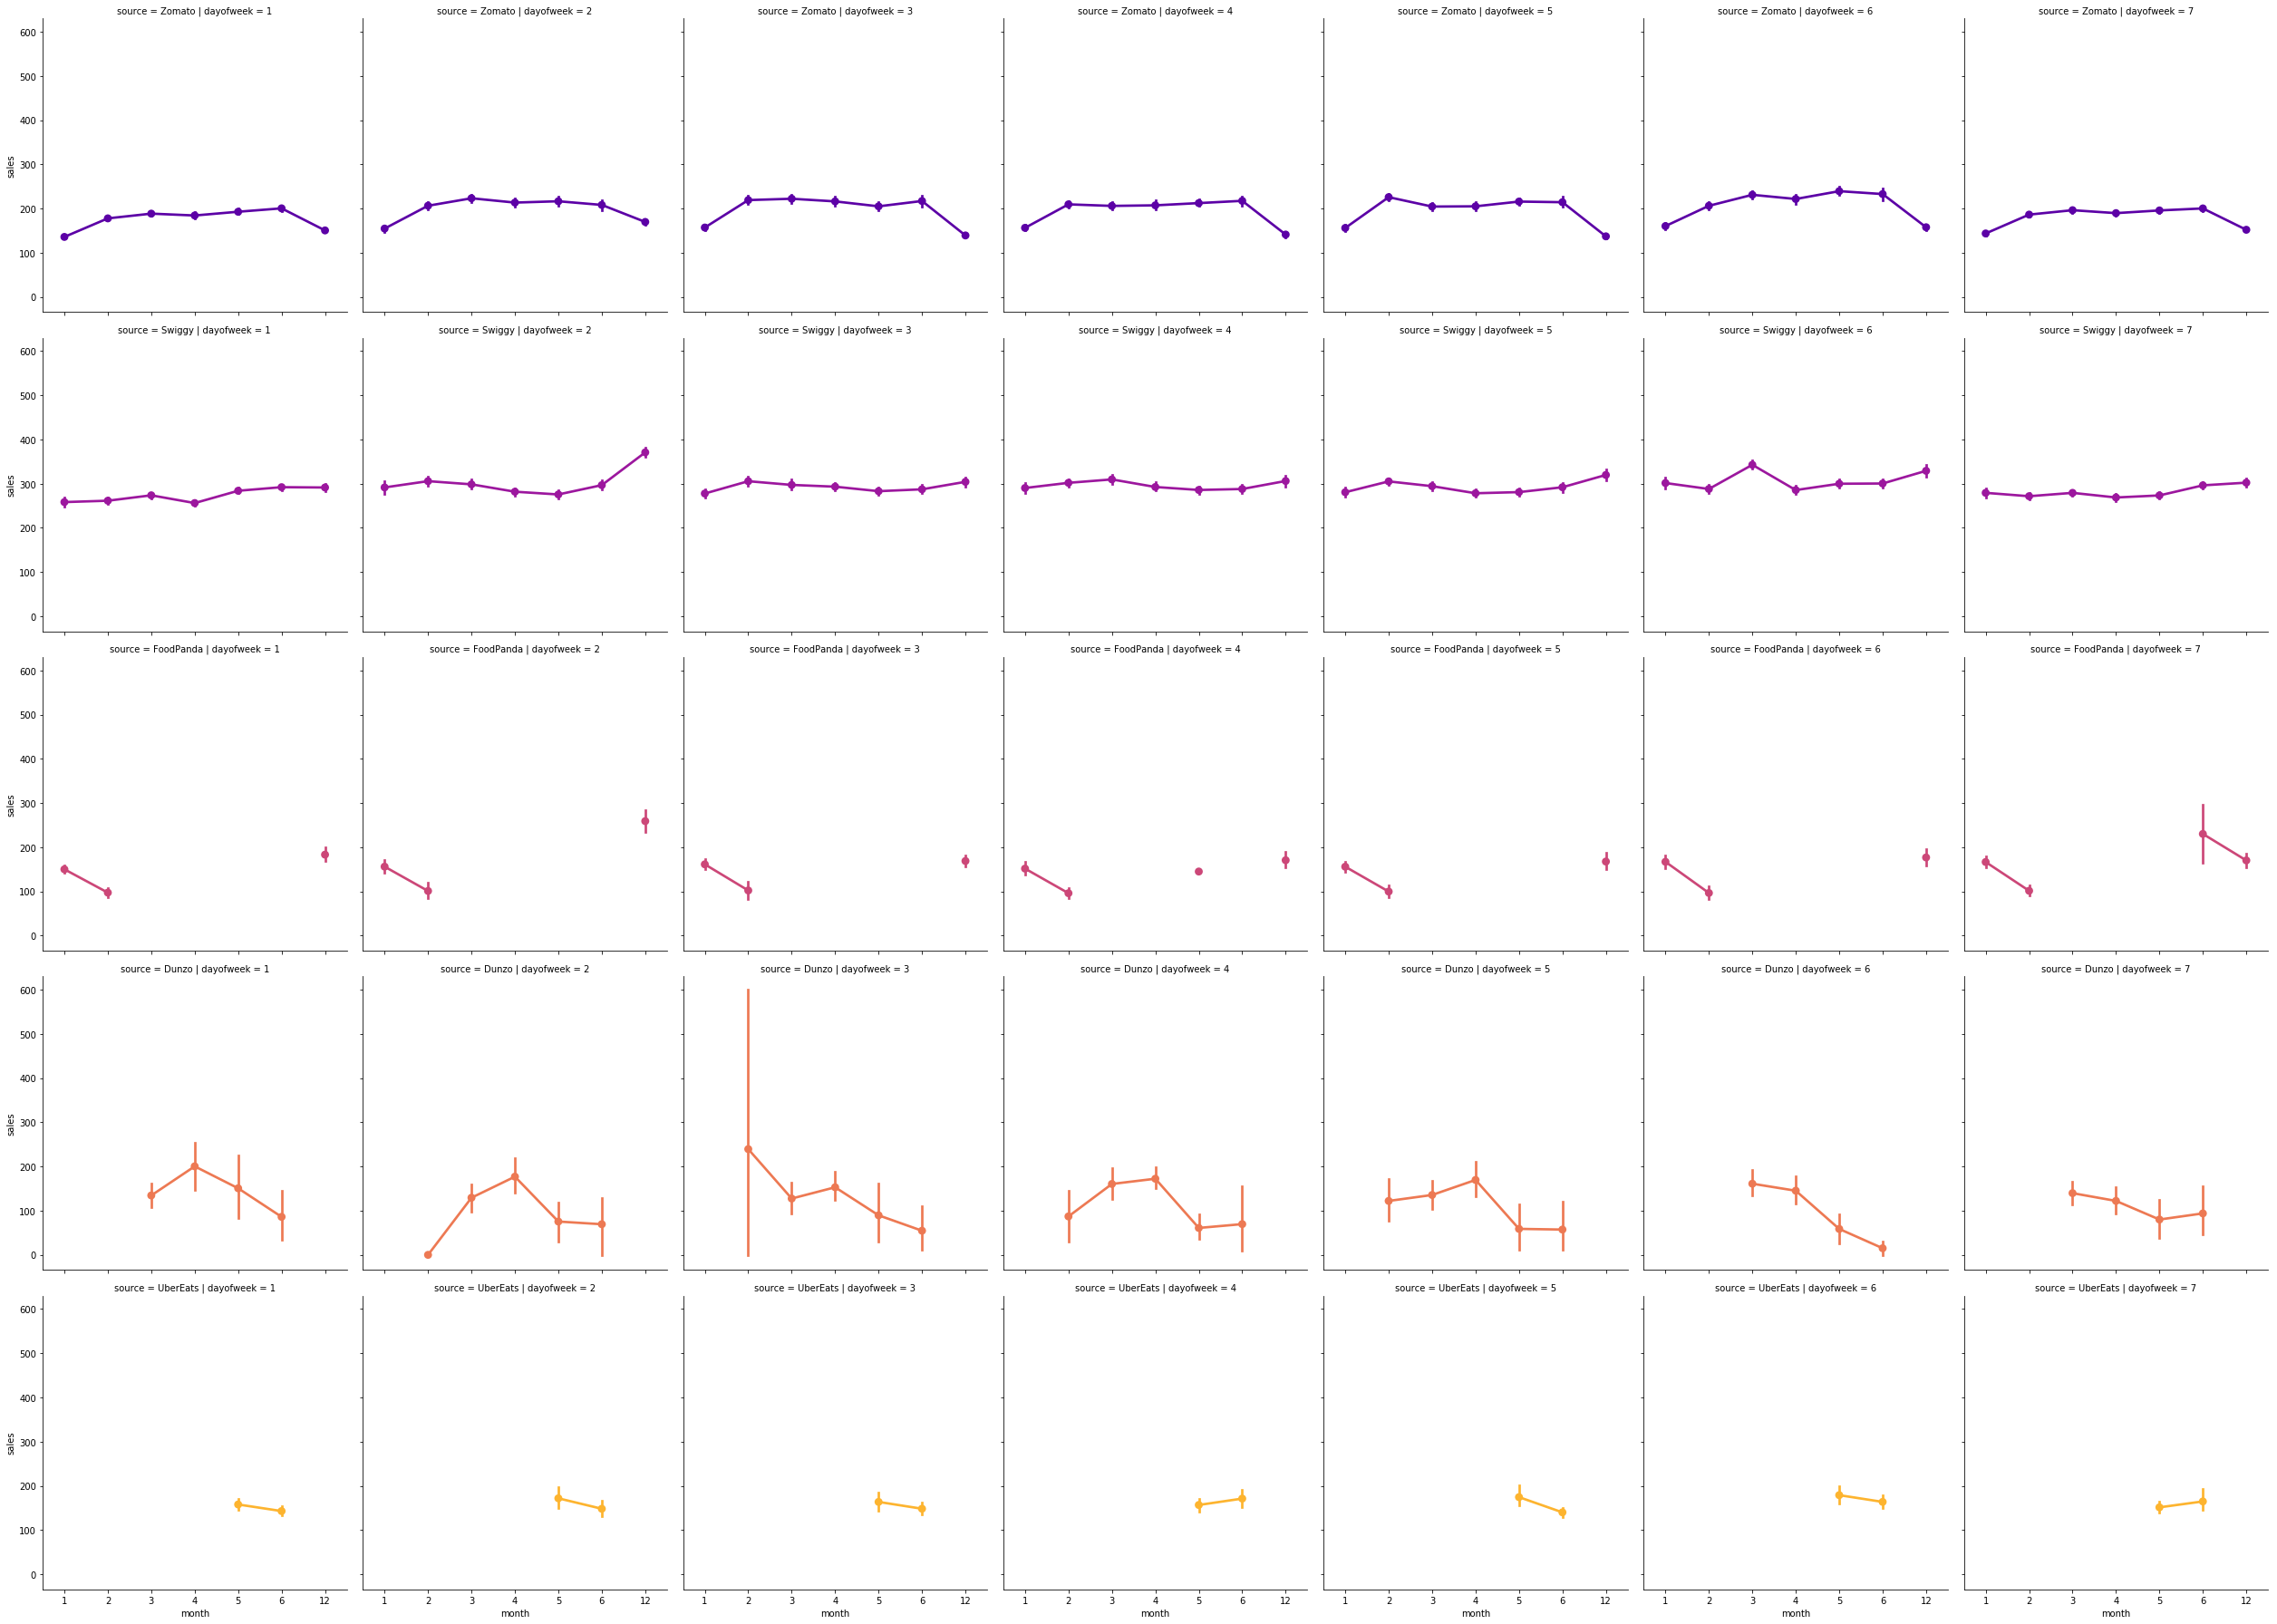

In [32]:
c = '#386B7F'
sns.factorplot(data = df, x = 'month', y = "sales", 
               col = 'dayofweek', # per store type in cols
               palette = 'plasma',
               hue = 'source',
               row = 'source', # per store type in rows
               color = c) 

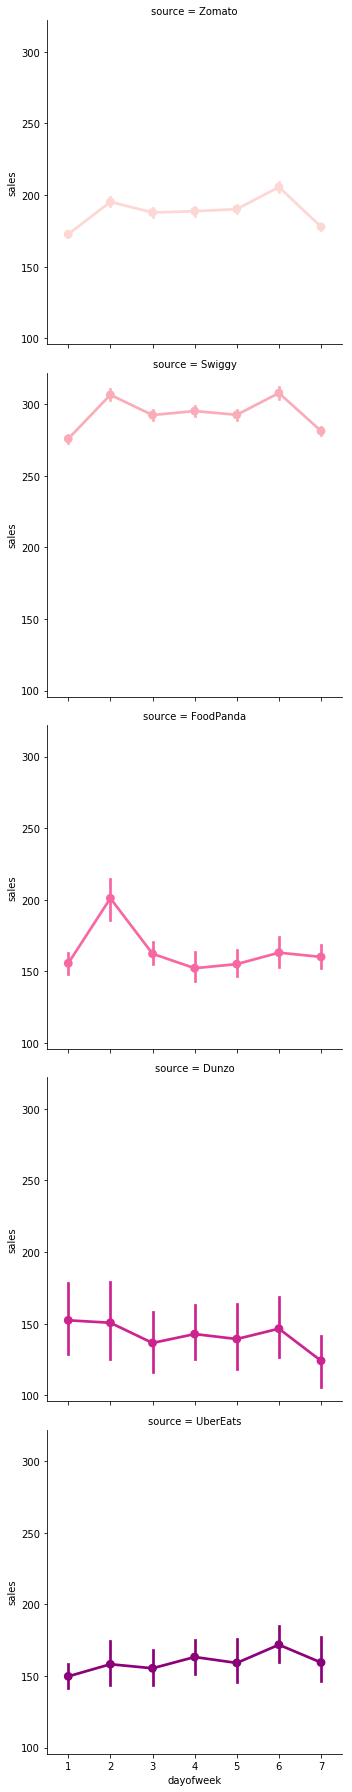

In [33]:
# sale  trends
sns.factorplot(data = df, x = 'dayofweek', y = "sales", 
               row = 'source',
               hue = 'source',
               palette = 'RdPu') 

In [34]:
sales = df.loc[:, ['date', 'sales']]

In [35]:
sales = sales.groupby('date')['sales'].sum().reset_index()
print (sales)

          date      sales
0   2018-12-01  159799.00
1   2018-12-02  156268.00
2   2018-12-03  126096.00
3   2018-12-04  117490.00
4   2018-12-05  130559.00
5   2018-12-06  163064.00
6   2018-12-07  200771.00
7   2018-12-08  206678.00
8   2018-12-09  254533.00
9   2018-12-10  185920.00
10  2018-12-11  235572.00
11  2018-12-12  238651.00
12  2018-12-13  240625.00
13  2018-12-14  250480.00
14  2018-12-15  275849.00
15  2018-12-16  297664.00
16  2018-12-17  194428.00
17  2018-12-18  217788.00
18  2018-12-19  234557.00
19  2018-12-20  265073.00
20  2018-12-21  267775.00
21  2018-12-22  230950.00
22  2018-12-23  231671.00
23  2018-12-24  266326.00
24  2018-12-25  443790.00
25  2018-12-26  189069.00
26  2018-12-27  197846.00
27  2018-12-28  218282.00
28  2018-12-29  248617.00
29  2018-12-30  290447.00
30  2018-12-31  787272.00
31  2019-01-01  270442.00
32  2019-01-02  162056.00
33  2019-01-03  144053.00
34  2019-01-04  181955.00
35  2019-01-05  196656.00
36  2019-01-06  232757.00
37  2019-01-

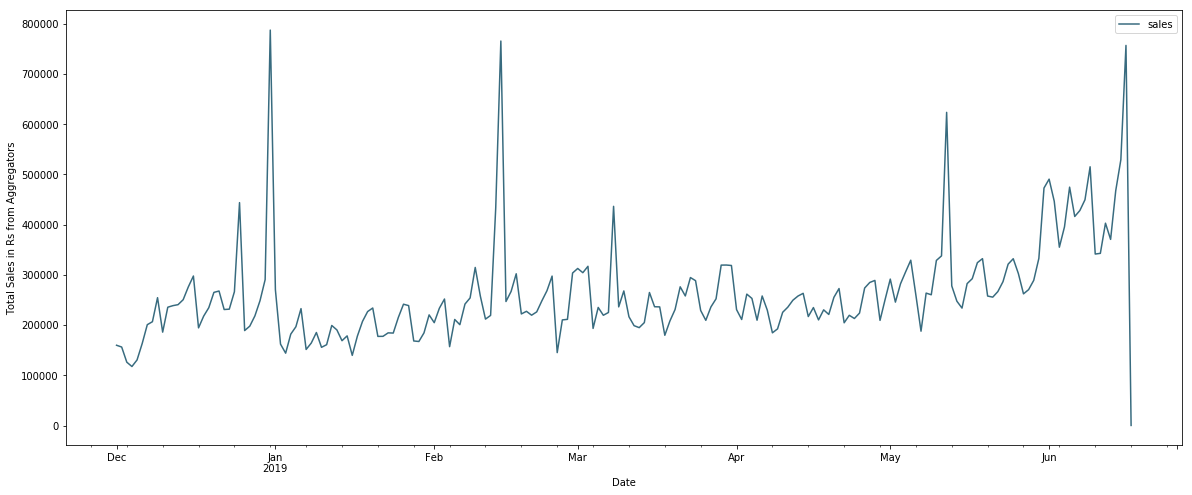

In [37]:
# plot daily sales
ax = sales.set_index('date').plot(figsize = (20, 8), color = c)
ax.set_ylabel('Total Sales in Rs from Aggregators')
ax.set_xlabel('Date')
plt.show()

In [62]:
sales = df.loc[:, ['dayofweek', 'sales']]

In [63]:
sales = sales.groupby('dayofweek')['sales'].mean().reset_index()
print (sales)

   dayofweek       sales
0          1  218.535213
1          2  248.088488
2          3  235.069478
3          4  237.634051
4          5  237.360718
5          6  254.248040
6          7  222.794980


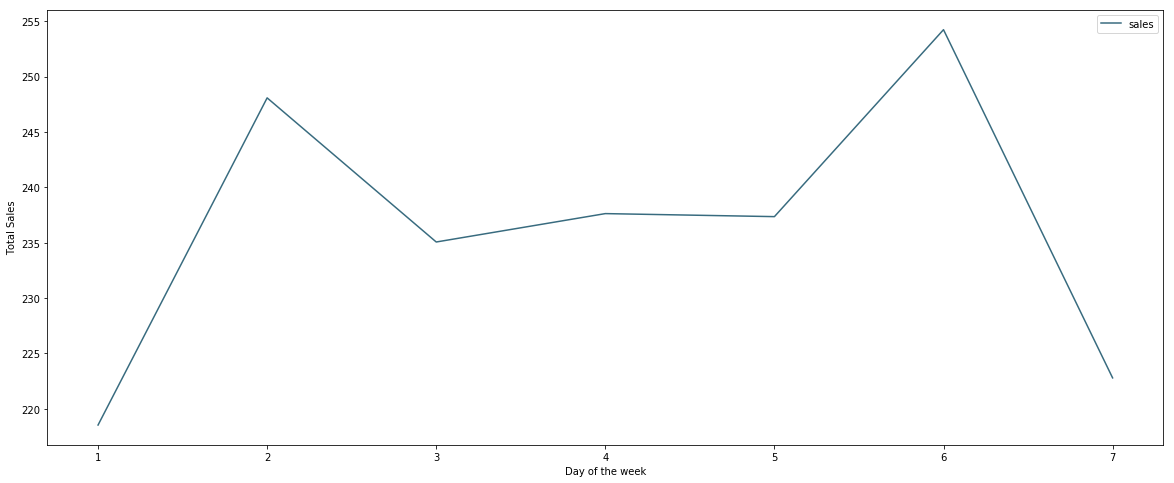

In [64]:
# plot day of week sales
ax = sales.set_index('dayofweek').plot(figsize = (20, 8), color = c)
ax.set_ylabel('Total Sales')
ax.set_xlabel('Day of the week')
plt.show()

In [65]:
# prophet by Facebook
from fbprophet import Prophet

In [66]:
sales = df.rename(columns = {'date': 'ds',
                                'sales': 'y'})
sales.head()

,orderId,status,kitchen,source,brand,orderComment,datetime,ds,dayofweek,dayofmonth,dayofyear,month,day,week,y,orderSeq
0,1401860184,DELIVERED,Whitefield,Zomato,Indiana Burgers,NaN,2018-12-01 00:00:00,2018-12-01,7,1,335,12,1,47,178.0,10412
1,1393137807,DELIVERED,Whitefield,Zomato,Warm Oven,NaN,2018-12-01 00:00:00,2018-12-01,7,1,335,12,1,47,609.0,10413
2,1242759148,DELIVERED,Whitefield,Zomato,Warm Oven,NaN,2018-12-01 00:01:00,2018-12-01,7,1,335,12,1,47,649.0,10414
3,1695355671,DELIVERED,Whitefield,Zomato,Warm Oven,NaN,2018-12-01 00:02:00,2018-12-01,7,1,335,12,1,47,140.0,10415
4,26677989628,DELIVERED,Whitefield,Swiggy,Slurpy Shakes,NaN,2018-12-01 00:03:00,2018-12-01,7,1,335,12,1,47,288.0,10416


In [67]:
sales = sales.groupby('ds')['y'].sum().reset_index()
print (sales)

            ds          y
0   2018-12-01  159799.00
1   2018-12-02  156268.00
2   2018-12-03  126096.00
3   2018-12-04  117490.00
4   2018-12-05  130559.00
5   2018-12-06  163064.00
6   2018-12-07  200771.00
7   2018-12-08  206678.00
8   2018-12-09  254533.00
9   2018-12-10  185920.00
10  2018-12-11  235572.00
11  2018-12-12  238651.00
12  2018-12-13  240625.00
13  2018-12-14  250480.00
14  2018-12-15  275849.00
15  2018-12-16  297664.00
16  2018-12-17  194428.00
17  2018-12-18  217788.00
18  2018-12-19  234557.00
19  2018-12-20  265073.00
20  2018-12-21  267775.00
21  2018-12-22  230950.00
22  2018-12-23  231671.00
23  2018-12-24  266326.00
24  2018-12-25  443790.00
25  2018-12-26  189069.00
26  2018-12-27  197846.00
27  2018-12-28  218282.00
28  2018-12-29  248617.00
29  2018-12-30  290447.00
30  2018-12-31  787272.00
31  2019-01-01  270442.00
32  2019-01-02  162056.00
33  2019-01-03  144053.00
34  2019-01-04  181955.00
35  2019-01-05  196656.00
36  2019-01-06  232757.00
37  2019-01-

In [68]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width = 0.95)
my_model.fit(sales)

# dataframe that extends into future 6 weeks 
future_dates = my_model.make_future_dataframe(periods = 6*7)

print("First week to forecast.")
future_dates.tail(45)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


First week to forecast.


,ds
196,2019-06-15
197,2019-06-16
198,2019-06-17
199,2019-06-18
200,2019-06-19
201,2019-06-20
202,2019-06-21
203,2019-06-22
204,2019-06-23
205,2019-06-24


In [69]:
# predictions
forecast = my_model.predict(future_dates)

# preditions for last week
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

,ds,yhat,yhat_lower,yhat_upper
234,2019-07-23,407215.117038,241299.924963,569898.288016
235,2019-07-24,416215.839230,232773.797863,572200.030583
236,2019-07-25,440463.697526,273794.597233,609654.550270
237,2019-07-26,456098.616466,295459.787286,625097.617242
238,2019-07-27,466334.354881,308692.473636,638633.807831
239,2019-07-28,492676.440935,334457.051807,654051.618677
240,2019-07-29,409297.751297,251509.725474,577663.304058


In [70]:
fc = forecast[['ds', 'yhat']].rename(columns = {'Date': 'ds', 'Forecast': 'yhat'})

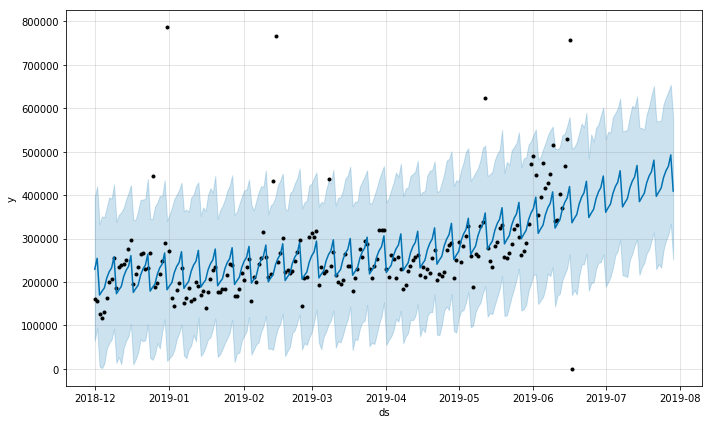

In [71]:
my_model.plot(forecast);

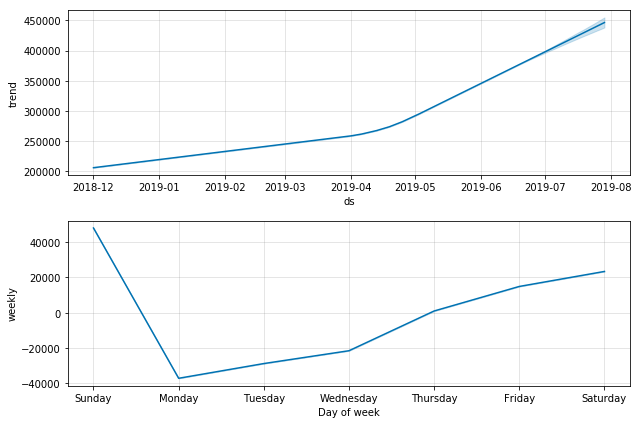

In [72]:
my_model.plot_components(forecast);